# Transformation Matrix Sandbox
In-class demo: Tuesday, 09/08

__Objectives__:
1. Use matrix multiplication (the "dot product") to manipulate data.
2. Play around with transformations until they make a little more sense.
3. Prep for Thursday's discussion of normalization.

## PART 0: Original Data

__To do__: Run the cell below to visualize today's dataset.

Original M0.shape = (300, 3)

First few rows of M0:
[[-50.   50.    1. ]
 [-50.   48.4   1. ]
 [-49.9  46.8   1. ]
 [-49.8  45.2   1. ]
 [-49.6  43.7   1. ]]


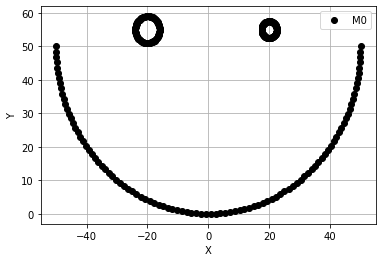

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=1, suppress=True)

# Smiley face dataset
n = 100
theta = np.linspace( -np.pi, 0, n ).reshape((n,1))
X_mouth = 50*np.cos(theta)
Y_mouth = 50*np.sin(theta) + 50
X_left = 4*np.cos(theta*2.0) - 20
Y_left = 4*np.sin(theta*2.0) + 55
X_right = 2.5*np.cos(theta*2.0) + 20
Y_right = 2.5*np.sin(theta*2.0) + 55
X = np.vstack((X_mouth, X_left, X_right))
Y = np.vstack((Y_mouth, Y_left, Y_right))
H = np.ones((X.shape))
M0 = np.hstack((X,Y,H))

# Sanity check
print("Original M0.shape =", M0.shape)
print("\nFirst few rows of M0:")
print(M0[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

## PART 1: Transformation T1

The cell below applies a transformation matrix to the smileface dataset. Look at the difference between the original dataset and the transformed data, then decide which kind of transformation pre-multiplying the dataset by T1 performs: 
* identity (no transformation),
* translation, 
* scale, 
* rotation, or 
* a combination of the above.

>> *What kind of transformation does T1 perform? Double-click to enter your answer.*

__Answer__ : Translation

T1:
[[  1.   0. -50.]
 [  0.   1.  25.]
 [  0.   0.   1.]]

Transformed M1.shape = (300, 3)

First few rows of M1:
[[-100.    75.     1. ]
 [-100.    73.4    1. ]
 [ -99.9   71.8    1. ]
 [ -99.8   70.2    1. ]
 [ -99.6   68.7    1. ]]


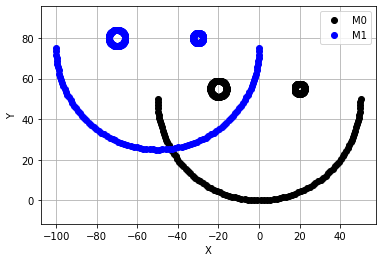

In [10]:
# Transformation Matrix T1
T1 = np.eye( 3 )
T1[0,2] = -50
T1[1,2] = 25
print("T1:")
print(T1)

# Perform Transformation T1
M1 = (T1 @ M0.T).T

# Sanity check
print("\nTransformed M1.shape =", M1.shape)
print("\nFirst few rows of M1:")
print(M1[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M1[:,0], M1[:,1], "ob", label="M1" )
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

## PART 2: Transformation T2

The cell below applies a transformation matrix to the smiley face dataset. Look at the difference between the original dataset and the transformed data, then decide which kind of transformation pre-multiplying the dataset by T1 performs: 
* identity (no transformation),
* translation, 
* scale, 
* rotation, or 
* a combination of the above.

>> *What kind of transformation does T1 perform? Double-click to enter your answer.*

__Answer__ : Scale

T2:
[[3.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]

Transformed M2.shape = (300, 3)

First few rows of M2:
[[-150.    25.     1. ]
 [-149.9   24.2    1. ]
 [-149.7   23.4    1. ]
 [-149.3   22.6    1. ]
 [-148.8   21.8    1. ]]


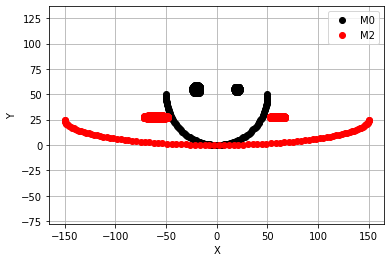

In [2]:
# Transformation Matrix T2
T2 = np.eye( 3 )
T2[0,0] = 3
T2[1,1] = 0.5
print("T2:")
print(T2)

# Perform Transformation T2
M2 = (T2 @ M0.T).T

# Sanity check
print("\nTransformed M2.shape =", M2.shape)
print("\nFirst few rows of M2:")
print(M2[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
#plt.plot( M1[:,0], M1[:,1], "ob", label="M1" )
plt.plot( M2[:,0], M2[:,1], "or", label="M2" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

## PART 3: Compound Transformation T12

Let's see what happends when we apply both transformations: T1 then T2. __Sketch what you think the output might look like on a piece of scrap paper before running the code cell.__

T12:
[[   3.     0.  -150. ]
 [   0.     0.5   12.5]
 [   0.     0.     1. ]]

Transformed M12.shape = (300, 3)

First few rows of M12:
[[-300.    37.5    1. ]
 [-299.9   36.7    1. ]
 [-299.7   35.9    1. ]
 [-299.3   35.1    1. ]
 [-298.8   34.3    1. ]]


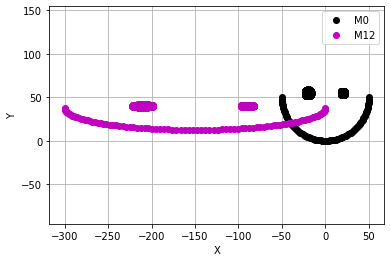

In [11]:
# Apply both transformations: T1 then T2
M12 = (T2 @ T1 @ M0.T).T

# Sanity check
T12 = T2 @ T1
print("T12:")
print(T12)
print("\nTransformed M12.shape =", M12.shape)
print("\nFirst few rows of M12:")
print(M12[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M12[:,0], M12[:,1], "om", label="M12" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

## PART 4: Compound Transformation T21

Let's see what happends when we apply both transformations: T2 then T1. __Sketch what you think the output might look like on a piece of scrap paper before running the code cell.__



T21:
[[  3.    0.  -50. ]
 [  0.    0.5  25. ]
 [  0.    0.    1. ]]

Transformed M21.shape = (300, 3)

First few rows of M21:
[[-200.    50.     1. ]
 [-199.9   49.2    1. ]
 [-199.7   48.4    1. ]
 [-199.3   47.6    1. ]
 [-198.8   46.8    1. ]]


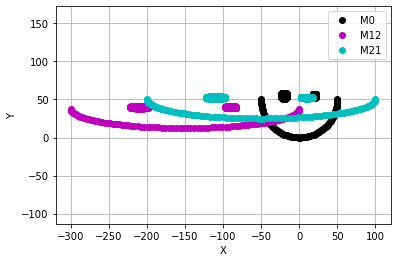

In [12]:
# Apply both transformations: T2 then T1
M21 = (T1 @ T2 @ M0.T).T

# Sanity check
T21 = T1 @ T2
print("T21:")
print(T21)
print("\nTransformed M21.shape =", M21.shape)
print("\nFirst few rows of M21:")
print(M21[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M12[:,0], M12[:,1], "om", label="M12" )
plt.plot( M21[:,0], M21[:,1], "oc", label="M21" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

## BONUS: Investigate order of operations

If W1 matches M1, then the following two expressions are equivalent:


*   `M1 = (T1 @ M0.T).T`
*   `W1 = M0 @ T1.T`



T1:
[[  1.   0. -50.]
 [  0.   1.  25.]
 [  0.   0.   1.]]

Transformed W1.shape = (300, 3)

First few rows of W1:
[[-100.    75.     1. ]
 [-100.    73.4    1. ]
 [ -99.9   71.8    1. ]
 [ -99.8   70.2    1. ]
 [ -99.6   68.7    1. ]]


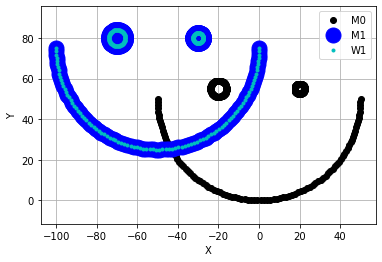

In [13]:
# Check to see if we get the same result when the order of matrices is reversed
W1 = M0 @ T1.T

# Sanity check
print("T1:")
print(T1)
print("\nTransformed W1.shape =", W1.shape)
print("\nFirst few rows of W1:")
print(W1[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M1[:,0], M1[:,1], "ob", markersize=15, label="M1" )
plt.plot( W1[:,0], W1[:,1], ".c", label="W1" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

If W2 matches M2, then the following two expressions are equivalent:


*   `M2 = (T2 @ M0.T).T`
*   `W2 = M0 @ T2.T`



T2:
[[3.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]

Transformed W2.shape = (300, 3)

First few rows of W2:
[[-150.    25.     1. ]
 [-149.9   24.2    1. ]
 [-149.7   23.4    1. ]
 [-149.3   22.6    1. ]
 [-148.8   21.8    1. ]]


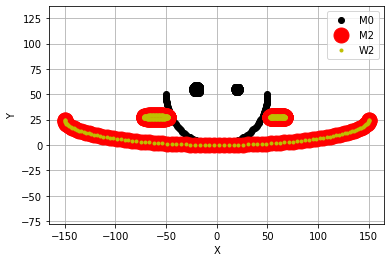

In [14]:
# Check to see if we get the same result when the order of matrices is reversed
W2 = M0 @ T2.T

# Sanity check
print("T2:")
print(T2)
print("\nTransformed W2.shape =", W2.shape)
print("\nFirst few rows of W2:")
print(W2[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M2[:,0], M2[:,1], "or", markersize=15, label="M2" )
plt.plot( W2[:,0], W2[:,1], ".y", label="W2" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

Which of the following expressions are equivalent?

*   `M12 = (T2 @ T1 @ M0.T).T`
*   `M21 = (T1 @ T2 @ M0.T).T`
*   `W12 = M0 @ T1.T @ T2.T`
*   `W21 = M0 @ T2.T @ T1.T`


T12:
[[   3.     0.  -150. ]
 [   0.     0.5   12.5]
 [   0.     0.     1. ]]

Transformed W12.shape = (300, 3)

First few rows of W12:
[[-300.    37.5    1. ]
 [-299.9   36.7    1. ]
 [-299.7   35.9    1. ]
 [-299.3   35.1    1. ]
 [-298.8   34.3    1. ]]


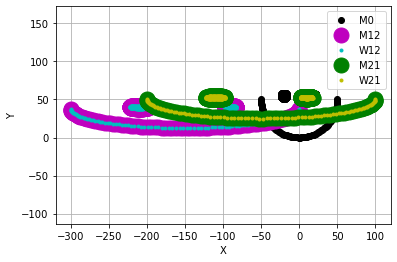

In [15]:
# Check to see if we get the same result when the order of matrices is reversed
W12 = M0 @ T1.T @ T2.T      # Order of transformation matrices also had to be reversed in order to apply translation first (T1), and then scale (T2)
W21 = M0 @ T2.T @ T1.T      # ... which means that this will apply scale first (T2), and then translation (T1)

# Sanity check
T12 = (T1.T @ T2.T).T
print("T12:")
print(T12)
print("\nTransformed W12.shape =", W12.shape)
print("\nFirst few rows of W12:")
print(W12[0:5,:])

# Visualization
plt.plot( M0[:,0], M0[:,1], "ok", label="M0" )
plt.plot( M12[:,0], M12[:,1], "om", markersize=15, label="M12" )
plt.plot( W12[:,0], W12[:,1], ".c", label="W12" )
plt.plot( M21[:,0], M21[:,1], "og", markersize=15, label="M21" )
plt.plot( W21[:,0], W21[:,1], ".y", label="W21" )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()